## 개요 ##


- 문제 정의: 특정한 하나의 상품 판매가 늘었을 때 다른 상품의 판매가 어떠한 연관성을 가지는지 파악
- 데이터 수집: 캐글 Groceries dataset
- 고객이 구매한 식료품으로 고객 번호, 날짜, 상품 정보의 세 가지 속성으로 구성(Member_number, Date, itemDescription)


## 연관 분석 ##


- 연관 분석은 하나의 거래나 사건에 포함되어 있는 둘 이상의 품목들의 상호관련성을 발견하는 것이다.
- 예를 들면 신발을 구매하는 고객의 10%는 양말을 동시에 구매하는 것이다.
- 연관분석을 위해서는 거래가 많이 이뤄지는 빈발 항목 집합과 연관 규칙을 구해야 한다.
- 빈발 항복은 거래에서 자주 함께 구매하는 항목 조합을 찾는 것이다.
- 지지도, 신뢰도, 향상도를 기준으로 연관 규칙을 찾는다.


## 연관 분석 수행 과정 ##


- 식료품 데이터셋에는 고객이 마트에서 구매한 식료품 목록이 저장돼 있다.
- 연관 분석을 위해 식료품 구매 데이터를 트랜젝션 데이터로 변환한다.
- 트랜젝션은 하나의 논리적 기능을 수행하기 위한 작업의 단위 또는 한꺼번에 모두 수행돼야 할 일련의 연산들을 의미한다.
- 트랜젝션 데이터에는 날짜별 고객별 거래 정보가 저장된다.
- 구매한 식료품 조합에서 최소 지지도를 만족하는 빈발 항목 조합을 찾는다.
- 지지도는 2가지 이상의 거래가 함게 발생할 확률을 말한다.
- 최소 지지도를 만족하면 빈발 항목 집합이 된다.
- 향상도와 신뢰도를 활용하여 연관 규칙을 구하고, 지지도, 향상도, 신뢰도를 평가하여 연관 분석을 수행한다.


## 주요 공식 ##
- 지지도: 지지도(A,B) = A와 B가 동시에 포함된 거래수 / 전체 거래수
- 신뢰도: 신뢰도(A -> B) = A와 B가 동시에 포함된 거래수 / A를 포함하는 거래수
- 향상도: 향상도(A, B) = A와 B가 동시에 발생할 확률 / A가 독립적으로 발생할 확률 * B가 독립적으로 발생할 확률
- 참조: https://davincicoding.co.kr/46


In [22]:
# 지지도(support) : A , B 교집합 
# 신뢰도 (confidence) : A,B 교집합 나누기 A 
# 향상도(Lift) : A,b 교집합 나누기 A*B

In [23]:
# 데이터 로드 
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [25]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [26]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

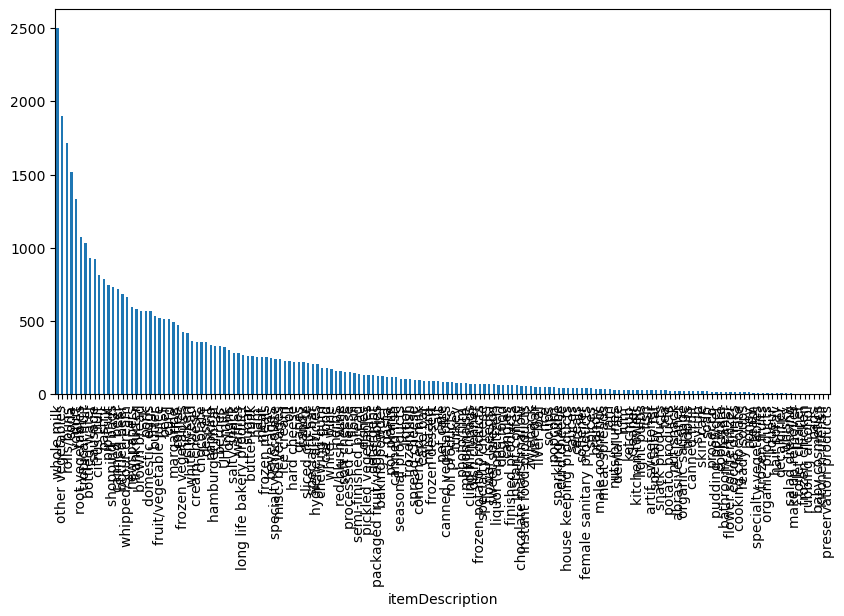

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
df['itemDescription'].value_counts().plot(kind='bar')
plt.show()

In [28]:
# 아이템이 문자로 표현돼 있다. 
# 이들 구매 품목을 원한 인코딩으로 변환한다.
# 이를 통해 날짜별 고객별 거래 데이터를 합산하여 연관 분석에 사용한다. 
# 사용 함수는 get_dummies(): 0과 1 의 수치형 데이터로 변환한다. 
#a,b,c,d,
a = ['a', 'b', 'c', 'd']
a_one_hot = pd.get_dummies(a)
a_one_hot

,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


In [29]:
products = df['itemDescription'].unique()
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [30]:
one_hot = pd.get_dummies(df['itemDescription'])
one_hot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# 고객 번호, 날짜와 원핫 인코딩 항목 결합 
df2 = df.drop('itemDescription', axis=1)
df2 = df2.join(one_hot)
df2.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [33]:
# 날짜별, 고객별로 그룹화하여 transaction 이라는 이름에 저장 
# 각 항목의 값이 1 이상이면 해당 품목을 구매했다는 의미 

# columns_with_products = [col for col in df2.columns if col.endswith("products")]

# print("Products로 끝나는 컬럼:", columns_with_products)
# print(df2[columns_with_products])

# 고객별, 날짜별로 그룹화하여 항목 집합의 모든 행렬로 합을 구한다. 
transaction = df2.groupby(['Member_number', 'Date'])[products[:]].apply(sum)

# 고객번호 속성을 인덱스에서 해제  
transaction = transaction.reset_index('Member_number')
transaction

# 같은 고객이 다른 날짜에 식료품을 구매한 경우 다른 거래로 데이터 테이블에 저장 

C:\Users\3호실-09\AppData\Local\Temp\ipykernel_17436\1509317731.py:10: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  transaction = df2.groupby(['Member_number', 'Date'])[products[:]].apply(sum)
C:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Member_number,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
Date,,,,,,,,,,,,,,,,,,,,,
15-03-2015,1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-06-2014,1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-07-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-11-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27-05-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-01-2015,4999,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26-12-2015,4999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09-03-2014,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# transaction 통계 확인 
transaction.describe()

,Member_number,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,3006.840807,0.068970,0.167212,0.049723,0.126846,0.114683,0.007886,0.054267,0.034485,0.038762,...,0.004678,0.003275,0.001804,0.000401,0.000735,0.001136,0.001002,0.000334,0.000334,0.000067
std,1152.947471,0.258374,0.398805,0.220432,0.347547,0.333810,0.089208,0.231513,0.185385,0.198160,...,0.069212,0.057134,0.042442,0.020021,0.027105,0.033689,0.031647,0.018278,0.018278,0.008175
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5000.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# 연관 분석 알고리즘을 적용하려면 0,1 과 같은 이진화된 값을 사용해야한다.
# 따라서 1을 초과하는 경우 1로 대체한다. 

transaction2 = transaction.iloc[:,1:] # 1번(고객 번호를) 제외한 항목별 거래 데이터만 저장
transaction2[transaction2 >= 1] = 1 # 트랜섹션의 속성값이 1 이상인 경우 1로 대체 
transaction2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
Date,,,,,,,,,,,,,,,,,,,,,
15-03-2015,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-06-2014,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-01-2015,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
transaction2.describe()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.067767,0.157923,0.049054,0.122101,0.110005,0.007819,0.053131,0.033950,0.037760,0.027869,...,0.004611,0.003275,0.001804,0.000401,0.000735,0.001136,0.001002,0.000334,0.000334,0.000067
std,0.251354,0.364681,0.215989,0.327414,0.312906,0.088083,0.224302,0.181108,0.190621,0.164602,...,0.067753,0.057134,0.042442,0.020021,0.027105,0.033689,0.031647,0.018278,0.018278,0.008175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# 가공한 데이터 저장 
transaction2.to_csv('groceries_transaction.csv')


## Apriori와 FP growth 알고리즘 ##


- Apriori
 - 빈발 항목을 효율적으로 찾기 위한 방법
 - 먼저 최소 지지도를 설정하고, 이를 기준으로 데이터에서 유의미한 항목 집합을 찾는다.
 - 초기에는 단일 항목 집합의 지지도를 계산하여 최소 지지도를 충족하는 항목을 선정한다.
 - 다음으로 이전 단계에서 찾은 항목 집합을 이용하여 후보 항목 집합을 생성한다.
 - 후보 항목 집합의 지지도를 계산하고 최소 지지도와 비교하여 빈번한 항목 집합을 추출한다.
 - 이 과정을 빈번한 항목 집합이 없을 때까지 계속해서 크기가 증가하는 항목 집합을 생성하고 최소 지지도를 충족하는지 확인하여 연관성 있는 항목 집합을 도출한다.


- FP Growth 알고리즘
 - 데이터에서 자주 발생하는 패턴이 무엇인지를 찾는다.
 - 이는 빈발 패턴을 의미한다.
 - 이 알고리즘은 데이터를 처리하는 동안 트리구조를 이용하여 빈발 패턴을 찾아 연관규칙을 생성한다.


In [ ]:
# 연관 규칙 사용 알고리즘 라이브러리 
from mlxtend.frequent_patterns import fpgrowth, association_rules

# FP Growth를 적용하고 최소 지지도를 0.01, 최대 항목수를 3으로 설정하여 빈발 항목 집합을 찾는다. 
frequent_itemsets = fpgrowth(transaction2, min_support=0.01, max_len=3, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=True).head(10)

# 단일 항목을 제외하면 (rolls/buns, other vegetables), (yogurts, whole milk), (soda, whole milk)결과 

,support,itemsets
52,0.010025,(soft cheese)
47,0.010158,(processed cheese)
26,0.010493,(red/blush wine)
67,0.010559,"(rolls/buns, other vegetables)"
37,0.010559,(herbs)
64,0.011161,"(whole milk, yogurt)"
65,0.011629,"(soda, whole milk)"
35,0.011696,(white wine)
62,0.011829,(cat food)
63,0.012030,(chewing gum)


In [40]:
# 빈발 항목 집합 개수 
frequent_itemsets.shape

(69, 2)

In [41]:
# 최소 지지도를 0.001
frequent_itemsets = fpgrowth(
    transaction2, min_support=0.001, max_len=3, use_colnames=True
)
frequent_itemsets.sort_values(by=["support"], ascending=True).head(10)

frequent_itemsets.shape

(750, 2)

In [42]:
# 연관 규칙 검색  # lift 향상도 
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.001, num_itemsets=100 )
rules.sort_values(by=['lift'], ascending=False)
rules.head()

# frequent_itemsets: 연관 분석에서 생성된 빈발 항목 집합(frequent itemsets)을 포함하는 데이터프레임.
# metric: 규칙을 평가하기 위한 기준 (예: 'lift', 'confidence', 'support' 등).
# min_threshold: 지정된 metric에 대한 최소 임계값. 규칙의 품질을 필터링합니다.


# metric='support': 데이터에서 가장 빈도가 높은 규칙을 찾고 싶을 때.
# metric='confidence': 특정 조건에서 결과가 발생할 가능성을 보고 싶을 때.
# metric='lift': 규칙의 상관관계를 깊이 분석하고 싶을 때.


# lift(상관관계)가 높은 값 순으로 1238개 데이터가 정렬된다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
2,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,1.0,-0.002525,0.972342,-0.324769,0.032818,-0.028445,0.063790
3,(yogurt),(soda),0.085879,0.097106,0.005814,0.067704,0.697219,1.0,-0.002525,0.968463,-0.322065,0.032818,-0.032564,0.063790
4,(other vegetables),(yogurt),0.122101,0.085879,0.008087,0.066229,0.771192,1.0,-0.002399,0.978957,-0.252593,0.040455,-0.021496,0.080196


In [43]:
rules.shape

(1238, 14)

In [ ]:
# antecedents: 선행 항목 , consequents : 후행 항목
# 선생 항목, 후행 항목, 지지도, 신뢰도, 향상도 5개 속성만 추출 
fp_rules = rules.loc[:, ["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values(by=['lift'], ascending=False).head(10)

# 소세지와 우유 요거트 동시에 구매할 확률이 높다 - 지지도 
# 소세지를 구매한후 우유와 요거트를 구매하는 경우의 신뢰도는 0.02 우유와 요거트를 구매후 소세지를 구매하는 경우 0.13보다 낮다 
# 이는 우유와 요거트를 구매한 후 소세지를 구매할 확률이 높다 
# 향상도(lift)가 1보다 크면 선행항목과 후행항목을 동시에 구매할 가능성이 높다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
38,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
39,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,1.0,0.000797,1.013532,0.576701,0.020992,0.013351,0.078050
36,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
41,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650
465,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,1.0,0.000555,1.010726,0.417500,0.020731,0.010612,0.057141
464,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,1.0,0.000555,1.038081,0.401735,0.020731,0.036684,0.057141
37,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
40,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,1.0,0.000563,1.003596,0.454430,0.009065,0.003583,0.132562
707,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,1.0,0.000408,1.006118,0.409366,0.013986,0.006081,0.062684
706,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,1.0,0.000408,1.046969,0.385385,0.013986,0.044862,0.062684


<Axes: xlabel='support', ylabel='confidence'>

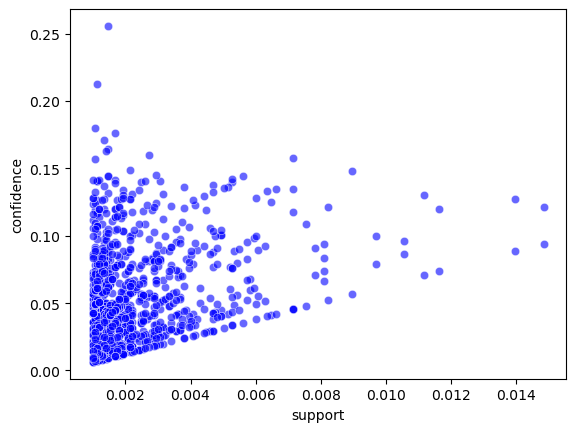

In [46]:
# 연관 규칙 시각화 - 지지도와 신뢰도의 분포 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.scatterplot(x="support", y="confidence", data=fp_rules, color='blue' , alpha=0.6)

# 지지도가 높아지면 신뢰도가 높아지는 경향을 보인다. 
# 하지만 지지도가 0.06 이상이 되면 신뢰도와 연관되는 아이템 수가 현저히 적어진다. 
# 이는 한 쪽이 극단적으로 높으면 연관성이 작아진다는 것을 의미 

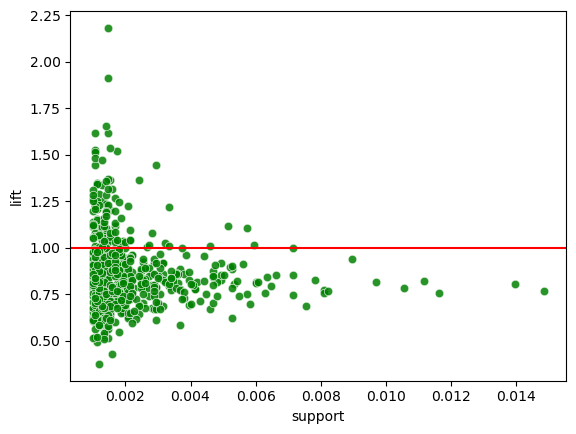

In [47]:
# 지지도와 향상도의 분포 시각화 
sns.scatterplot(x="support", y="lift", data=fp_rules, color="green", alpha=0.6)
plt.axhline(y=1, color='red')
plt.show()

# 지지도가 낮은 경우 향상도가 높아진다. 

<Axes: xlabel='confidence', ylabel='lift'>

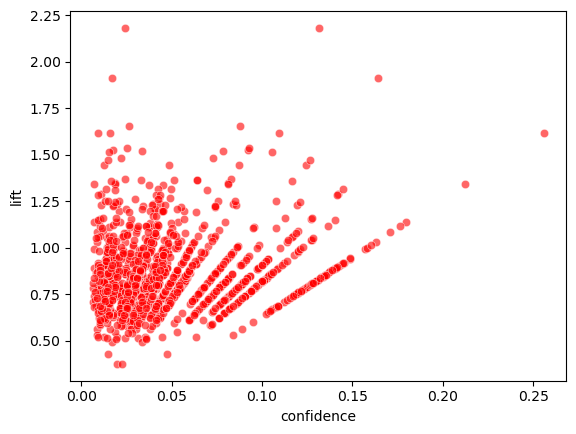

In [48]:
# 신뢰도와 향상도 분포 
sns.scatterplot(x="confidence", y="lift", data=fp_rules, color="red", alpha=0.6)


In [49]:
# 향상도(lift)가 1보다 큰 연관규칙 
# 이는 두가지 품목을 동시에 구매할 확률이 각각 구매할 확률보다 높다는 의미 
fp_rules[(fp_rules['lift']) > 1].sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,support,confidence,lift
37,"(sausage, yogurt)",(whole milk),0.001470,0.255814,1.619866
42,"(rolls/buns, sausage)",(whole milk),0.001136,0.212500,1.345594
48,"(soda, sausage)",(whole milk),0.001069,0.179775,1.138374
54,(semi-finished bread),(whole milk),0.001671,0.176056,1.114825
15,"(rolls/buns, yogurt)",(whole milk),0.001337,0.170940,1.082428
...,...,...,...,...,...
485,(whole milk),(detergent),0.001403,0.008887,1.030824
18,(whole milk),"(rolls/buns, yogurt)",0.001337,0.008464,1.082428
1207,(other vegetables),(pot plants),0.001002,0.008210,1.049991
47,(whole milk),"(rolls/buns, sausage)",0.001136,0.007194,1.345594


In [50]:
# 빵을 선행 항목으로 하는 연관 규칙 출력 
# frozenset: set 은 저장된 값의 순서가 없고, 중복을 허용하지 않는다. (파이선 문법)
# frozenset 은 할당된 집합의 값을 그대로 '얼려'서 저장
fp_rules[(fp_rules['antecedents'] == frozenset({'rolls/buns'}))].sort_values(by=['lift'], ascending=False)

# 빵을 구매한 후 가공 치즈를 구매할 가능성이 가장 높다. 
# 또한 빵을 구매한 후 적포도주를 구매할 확률도 높다. 

,antecedents,consequents,support,confidence,lift
986,(rolls/buns),(processed cheese),0.001470,0.013366,1.315734
579,(rolls/buns),(packaged fruit/vegetables),0.001203,0.010936,1.288421
1236,(rolls/buns),(seasonal products),0.001002,0.009113,1.286395
550,(rolls/buns),(red/blush wine),0.001337,0.012151,1.158028
45,(rolls/buns),"(sausage, whole milk)",0.001136,0.010328,1.153275
...,...,...,...,...,...
1161,(rolls/buns),(ham),0.001270,0.011543,0.674687
1098,(rolls/buns),(beverages),0.001203,0.010936,0.659796
452,(rolls/buns),(butter milk),0.001270,0.011543,0.656730
326,(rolls/buns),(whipped/sour cream),0.002941,0.026731,0.611595


## 전체 평가 ##


- 요거트와 소시지를 동시에 구매한 후 우유를 구매할 확률이 높다.
- 또한 소시지와 빵을 동시에 구매한 후 우유를 구매할 확률이 높다.
- 따라서 고객의 장바구니에 요거트와 소시지가 담겨 있다면 우유를 추천해주고, 상품이 진열된 굿을 쉽게 찾을 수 있도록 유도한다.
- 빵을 구매한 후 가공 치즈를 구매할 가능성이 가장 높고, 빵을 구매한 후 적포도주를 구매할 확률이 높다.
- 따라서 빵과 치즈, 와인을 가까이 진열한다.